In [1]:
# Joining Datasets
# Working with Time Series Datasets

## Working with Time Series

In [2]:
import os
import pandas as pd

In [3]:
pop_growth = pd.read_html('https://web.archive.org/web/20170127165708/https://www.census.gov/population/international/data/worldpop/table_population.php', 
                          attrs={'class': 'query_table'})[0]

pop_growth

,Year,Population,Annual Growth Rate (%),Annual Population Change
0,1950.0,2.557629e+09,1.459,37311223.0
1,1951.0,2.594940e+09,1.612,41832429.0
2,1952.0,2.636772e+09,1.717,45281083.0
3,1953.0,2.682053e+09,1.796,48174715.0
4,1954.0,2.730228e+09,1.900,51870839.0
...,...,...,...,...
106,2047.0,9.242433e+09,0.488,45138181.0
107,2048.0,9.287571e+09,0.474,44027603.0
108,2049.0,9.331598e+09,0.460,42885822.0
109,NaN,NaN,NaN,NaN


In [4]:
# Notice the differenc between the dates ?
pop_growth = pd.read_html('https://web.archive.org/web/20170127165708/https://www.census.gov/population/international/data/worldpop/table_population.php', 
                          attrs={'class': 'query_table'}, parse_dates=[0])[0]

pop_growth

,Year,Population,Annual Growth Rate (%),Annual Population Change
0,1950-01-01,2.557629e+09,1.459,37311223.0
1,1951-01-01,2.594940e+09,1.612,41832429.0
2,1952-01-01,2.636772e+09,1.717,45281083.0
3,1953-01-01,2.682053e+09,1.796,48174715.0
4,1954-01-01,2.730228e+09,1.900,51870839.0
...,...,...,...,...
106,2047-01-01,9.242433e+09,0.488,45138181.0
107,2048-01-01,9.287571e+09,0.474,44027603.0
108,2049-01-01,9.331598e+09,0.460,42885822.0
109,NaT,NaN,NaN,NaN


In [5]:
pop_growth.dropna

<bound method DataFrame.dropna of           Year    Population  Annual Growth Rate (%)  Annual Population Change
0   1950-01-01  2.557629e+09                   1.459                37311223.0
1   1951-01-01  2.594940e+09                   1.612                41832429.0
2   1952-01-01  2.636772e+09                   1.717                45281083.0
3   1953-01-01  2.682053e+09                   1.796                48174715.0
4   1954-01-01  2.730228e+09                   1.900                51870839.0
..         ...           ...                     ...                       ...
106 2047-01-01  9.242433e+09                   0.488                45138181.0
107 2048-01-01  9.287571e+09                   0.474                44027603.0
108 2049-01-01  9.331598e+09                   0.460                42885822.0
109        NaT           NaN                     NaN                       NaN
110 2050-01-01  9.374484e+09                     NaN                       NaN

[111 rows x 4 col

In [6]:
pop_growth.dropna(inplace = True)
pop_growth.head()

,Year,Population,Annual Growth Rate (%),Annual Population Change
0,1950-01-01,2.557629e+09,1.459,37311223.0
1,1951-01-01,2.594940e+09,1.612,41832429.0
2,1952-01-01,2.636772e+09,1.717,45281083.0
3,1953-01-01,2.682053e+09,1.796,48174715.0
4,1954-01-01,2.730228e+09,1.900,51870839.0


In [7]:
# general information about the data
pop_growth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 108
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Year                      100 non-null    datetime64[ns]
 1   Population                100 non-null    float64       
 2   Annual Growth Rate (%)    100 non-null    float64       
 3   Annual Population Change  100 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 3.9 KB


In [8]:
# to get the statistical attributes
pop_growth.describe()

,Population,Annual Growth Rate (%),Annual Population Change
count,1.000000e+02,100.000000,1.000000e+02
mean,5.989465e+09,1.308600,6.816856e+07
std,2.137825e+09,0.509496,1.305854e+07
min,2.557629e+09,0.460000,3.731122e+07
25%,4.070184e+09,0.872250,5.665819e+07
50%,6.046382e+09,1.261000,7.197001e+07
75%,7.937141e+09,1.740750,7.760646e+07
max,9.331598e+09,2.224000,8.807417e+07


In [9]:
# set the date as the index before periodic resampling

# pop_growth.index = pop_growth['Year']
#pop_growth

In [10]:
pop_growth

,Year,Population,Annual Growth Rate (%),Annual Population Change
0,1950-01-01,2.557629e+09,1.459,37311223.0
1,1951-01-01,2.594940e+09,1.612,41832429.0
2,1952-01-01,2.636772e+09,1.717,45281083.0
3,1953-01-01,2.682053e+09,1.796,48174715.0
4,1954-01-01,2.730228e+09,1.900,51870839.0
...,...,...,...,...
104,2045-01-01,9.148985e+09,0.516,47237518.0
105,2046-01-01,9.196222e+09,0.502,46210494.0
106,2047-01-01,9.242433e+09,0.488,45138181.0
107,2048-01-01,9.287571e+09,0.474,44027603.0


In [11]:
# set the date as the index before periodic resampling
pop_growth.set_index('Year', inplace=True)

pop_growth.head()

,Population,Annual Growth Rate (%),Annual Population Change
Year,,,
1950-01-01,2.557629e+09,1.459,37311223.0
1951-01-01,2.594940e+09,1.612,41832429.0
1952-01-01,2.636772e+09,1.717,45281083.0
1953-01-01,2.682053e+09,1.796,48174715.0
1954-01-01,2.730228e+09,1.900,51870839.0


In [12]:
#aggregate the data by 10 years downsampling, we can have different aggregation like sum, mean,last,firstmedian, mode etc
pop_growth.resample('10AS').mean()

,Population,Annual Growth Rate (%),Annual Population Change
Year,,,
1950-01-01,2.765922e+09,1.7529,48537285.4
1960-01-01,3.321900e+09,2.0094,66969623.4
1970-01-01,4.047646e+09,1.8154,73179902.2
1980-01-01,4.813578e+09,1.7438,83875618.4
1990-01-01,5.651506e+09,1.4220,80123197.0
2000-01-01,6.429734e+09,1.2017,77213097.9
2010-01-01,7.206287e+09,1.0742,77318221.4
2020-01-01,7.949758e+09,0.8687,68934817.8
2030-01-01,8.587652e+09,0.6741,57810604.6


In [13]:
pop_growth.resample('1Q').bfill().head()

,Population,Annual Growth Rate (%),Annual Population Change
Year,,,
1950-03-31,2.594940e+09,1.612,41832429.0
1950-06-30,2.594940e+09,1.612,41832429.0
1950-09-30,2.594940e+09,1.612,41832429.0
1950-12-31,2.594940e+09,1.612,41832429.0
1951-03-31,2.636772e+09,1.717,45281083.0


In [14]:
pop_growth.resample('1Q').ffill().head()

,Population,Annual Growth Rate (%),Annual Population Change
Year,,,
1950-03-31,2.557629e+09,1.459,37311223.0
1950-06-30,2.557629e+09,1.459,37311223.0
1950-09-30,2.557629e+09,1.459,37311223.0
1950-12-31,2.557629e+09,1.459,37311223.0
1951-03-31,2.594940e+09,1.612,41832429.0


In [15]:
#Pandas timestamp class

print(pd.Timestamp('August 3, 2022'))
print(pd.Timestamp('13/8/2022 21:00'))

2022-08-03 00:00:00
2022-08-13 21:00:00


In [16]:
pd.date_range(start ='1/8/2022', end = '3/8/2022', freq='B')

DatetimeIndex(['2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13',
               '2022-01-14', '2022-01-17', '2022-01-18', '2022-01-19',
               '2022-01-20', '2022-01-21', '2022-01-24', '2022-01-25',
               '2022-01-26', '2022-01-27', '2022-01-28', '2022-01-31',
               '2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04',
               '2022-02-07', '2022-02-08', '2022-02-09', '2022-02-10',
               '2022-02-11', '2022-02-14', '2022-02-15', '2022-02-16',
               '2022-02-17', '2022-02-18', '2022-02-21', '2022-02-22',
               '2022-02-23', '2022-02-24', '2022-02-25', '2022-02-28',
               '2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04',
               '2022-03-07', '2022-03-08'],
              dtype='datetime64[ns]', freq='B')

In [17]:
pd.date_range(start ='1/8/2022', end = '3/8/2022', freq='C')

DatetimeIndex(['2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13',
               '2022-01-14', '2022-01-17', '2022-01-18', '2022-01-19',
               '2022-01-20', '2022-01-21', '2022-01-24', '2022-01-25',
               '2022-01-26', '2022-01-27', '2022-01-28', '2022-01-31',
               '2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04',
               '2022-02-07', '2022-02-08', '2022-02-09', '2022-02-10',
               '2022-02-11', '2022-02-14', '2022-02-15', '2022-02-16',
               '2022-02-17', '2022-02-18', '2022-02-21', '2022-02-22',
               '2022-02-23', '2022-02-24', '2022-02-25', '2022-02-28',
               '2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04',
               '2022-03-07', '2022-03-08'],
              dtype='datetime64[ns]', freq='C')

In [18]:
pd.date_range(start ='1/8/2022', end = '3/8/2022', freq='W')

DatetimeIndex(['2022-01-09', '2022-01-16', '2022-01-23', '2022-01-30',
               '2022-02-06', '2022-02-13', '2022-02-20', '2022-02-27',
               '2022-03-06'],
              dtype='datetime64[ns]', freq='W-SUN')

mini project

1. download a file
2. resample the data daily using mean, median, sum, last and first
3. resmaple the data weekly
4. for each question 2 and 3 obtain the descriptive and interpret them
5. for each question 2 and 3 give appropriate visualisation contaning one and two variable
6. compare the results and discuss finding

In [19]:
import datetime
import pandas as pd
import numpy as np

In [20]:
#Q1
solar = pd.read_csv('/content/solar-measurementspakistan.csv', parse_dates= ['time'], index_col= ['time'])
solar.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ghi_pyr,dni,dhi,air_temperature,relative_humidity,wind_speed,wind_speed_of_gust,wind_from_direction_st_dev,wind_from_direction,barometric_pressure,sensor_cleaning,comments
time,,,,,,,,,,,,
2014-10-17 11:20:00,738.8,768.8,154.0,29.8,32.0,0.6,2.1,17.9,71.5,1002.0,1.0,NaN
2014-10-17 11:30:00,742.4,769.5,154.4,29.8,32.1,0.4,2.4,32.8,268.0,1001.9,0.0,NaN
2014-10-17 11:40:00,749.7,776.1,154.8,30.9,30.5,0.6,2.6,54.2,252.2,1001.8,0.0,NaN
2014-10-17 11:50:00,758.8,784.0,155.3,30.6,29.7,0.3,1.9,43.9,237.7,1001.6,0.0,NaN
2014-10-17 12:00:00,760.4,783.8,155.7,30.1,30.9,1.2,3.6,27.6,78.5,1001.4,0.0,NaN


In [21]:
#Q2
sum_solar = solar.resample('180d').sum()
sum_solar

,ghi_pyr,dni,dhi,air_temperature,relative_humidity,wind_speed,wind_speed_of_gust,wind_from_direction_st_dev,wind_from_direction,barometric_pressure,sensor_cleaning
time,,,,,,,,,,,
2014-01-11,267399.6,274146.0,118073.0,35527.8,104560.8,3536.2,5251.5,14344.8,287546.4,1729781.1,8.0
2014-07-10,1536983.5,1236082.5,452782.9,166603.9,613120.3,21398.1,31649.6,91427.6,1435253.6,9883616.3,38.0
2015-01-06,5878683.0,3495946.0,2006240.4,636698.5,1547105.7,78128.6,115787.6,306496.6,4374548.5,25736225.2,90.0
2015-07-05,5453677.9,4200052.5,2238255.3,629905.9,1640027.1,70860.2,106034.2,276424.7,4494625.6,25793937.6,111.0
2016-01-01,4071051.6,3120452.2,1819279.6,477701.1,1033580.7,53372.1,81208.6,217429.1,3175819.8,18523370.5,76.0
2016-06-29,5227370.3,4369933.0,2316303.4,642403.5,1392269.2,65337.5,98832.9,271728.4,4250489.0,24022973.9,128.0
2016-12-26,2940754.8,2482862.6,1291338.2,302142.0,845804.3,39355.7,58835.4,170594.2,2262513.1,14671081.4,92.0
2017-06-24,748015.7,766447.6,260417.4,58341.1,195784.7,8294.4,12744.0,38544.6,506746.6,3454202.9,19.0


In [22]:
#resampling in 6 months in different aggregates
solar_aggr = solar.resample('180d').agg(['min','max', 'mean', 'median', 'sum', 'last', 'first'])
solar_aggr

ghi_pyr                                                   dni  \
               min     max        mean median        sum last first  min   
time                                                                       
2014-01-11     0.0   670.3  154.745139   0.00   267399.6  0.0   0.0  0.0   
2014-07-10     0.0   958.3  155.754307   0.00  1536983.5  0.0   0.0  0.0   
2015-01-06     0.0  1188.6  227.221823   5.25  5878683.0  0.0   0.0  0.0   
2015-07-05     0.0  1094.4  210.404240   0.00  5453677.9  0.0   0.0  0.0   
2016-01-01     0.0  1077.7  218.380624   3.80  4071051.6  0.0   0.0  0.0   
2016-06-29     0.0  1052.2  216.078468   0.00  5227370.3  0.0   0.0  0.0   
2016-12-26     0.0  1036.3  200.201157   0.00  2940754.8  0.0   0.0  0.0   
2017-06-24     0.0   994.2  216.439728   0.00   748015.7  0.0   0.0  0.0   

                               ... barometric_pressure                  \
              max        mean  ...                 sum    last   first   
time                           ...                                       
2014-01-11  702.8  158.649306  ...           1729781.1  1002.9  1001.3   
2014-07-10  930.6  188.513421  ...           9883616.3   994.3   996.2   
2015-01-06  945.0  198.599443  ...          25736225.2   998.2   984.9   
2015-07-05  915.8  176.769886  ...          25793937.6  1007.2   989.1   
2016-01-01  960.2  171.783771  ...          18523370.5   988.1  1007.2   
2016-06-29  866.0  180.635458  ...          24022973.9  1004.6   988.0   
2016-12-26  983.6  169.028702  ...          14671081.4   991.3  1004.4   
2017-06-24  962.1  221.773032  ...           3454202.9   993.2   997.0   

           sensor_cleaning                                          
                       min  max      mean median    sum last first  
time                                                                
2014-01-11             0.0  1.0  0.004630    0.0    8.0  0.0   0.0  
2014-07-10             0.0  1.0  0.003851    0.0   38.0  0.0   0.0  
2015-01-06             0.0  1.0  0.003479    0.0   90.0  0.0   0.0  
2015-07-05             0.0  1.0  0.004282    0.0  111.0  0.0   0.0  
2016-01-01             0.0  1.0  0.004077    0.0   76.0  0.0   0.0  
2016-06-29             0.0  1.0  0.005291    0.0  128.0  0.0   0.0  
2016-12-26             0.0  1.0  0.006263    0.0   92.0  0.0   0.0  
2017-06-24             0.0  1.0  0.005498    0.0   19.0  0.0   0.0  

[8 rows x 77 columns]

In [23]:
#Q3 with missing value, droppong the missing value and back filling of missing value
solar.resample('w').agg(['min','max', 'mean', 'median', 'sum', 'last', 'first'])

ghi_pyr                                                dni         \
               min    max        mean median      sum last first  min    max   
time                                                                           
2014-01-12     0.0  654.9  154.936458    0.0  44621.7  0.0   0.0  0.0  553.9   
2014-01-19     NaN    NaN         NaN    NaN      0.0  NaN   NaN  NaN    NaN   
2014-01-26     NaN    NaN         NaN    NaN      0.0  NaN   NaN  NaN    NaN   
2014-02-02     NaN    NaN         NaN    NaN      0.0  NaN   NaN  NaN    NaN   
2014-02-09     NaN    NaN         NaN    NaN      0.0  NaN   NaN  NaN    NaN   
...            ...    ...         ...    ...      ...  ...   ...  ...    ...   
2017-11-12     NaN    NaN         NaN    NaN      0.0  NaN   NaN  NaN    NaN   
2017-11-19     NaN    NaN         NaN    NaN      0.0  NaN   NaN  NaN    NaN   
2017-11-26     NaN    NaN         NaN    NaN      0.0  NaN   NaN  NaN    NaN   
2017-12-03     0.0  897.3  205.554398    0.0  88799.5  0.0   0.0  0.0  827.1   
2017-12-10     0.0  988.9  296.002083   26.8  42624.3  0.0   0.0  0.0  794.1   

                        ... barometric_pressure                  \
                  mean  ...                 sum    last   first   
time                    ...                                       
2014-01-12  151.331944  ...            288446.8  1001.8  1001.3   
2014-01-19         NaN  ...                 0.0     NaN     NaN   
2014-01-26         NaN  ...                 0.0     NaN     NaN   
2014-02-02         NaN  ...                 0.0     NaN     NaN   
2014-02-09         NaN  ...                 0.0     NaN     NaN   
...                ...  ...                 ...     ...     ...   
2017-11-12         NaN  ...                 0.0     NaN     NaN   
2017-11-19         NaN  ...                 0.0     NaN     NaN   
2017-11-26         NaN  ...                 0.0     NaN     NaN   
2017-12-03  249.185880  ...            433365.8  1001.5  1002.8   
2017-12-10  268.790278  ...            143053.7   993.2   994.6   

           sensor_cleaning                                        
                       min  max      mean median  sum last first  
time                                                              
2014-01-12             0.0  1.0  0.003472    0.0  1.0  0.0   0.0  
2014-01-19             NaN  NaN       NaN    NaN  0.0  NaN   NaN  
2014-01-26             NaN  NaN       NaN    NaN  0.0  NaN   NaN  
2014-02-02             NaN  NaN       NaN    NaN  0.0  NaN   NaN  
2014-02-09             NaN  NaN       NaN    NaN  0.0  NaN   NaN  
...                    ...  ...       ...    ...  ...  ...   ...  
2017-11-12             NaN  NaN       NaN    NaN  0.0  NaN   NaN  
2017-11-19             NaN  NaN       NaN    NaN  0.0  NaN   NaN  
2017-11-26             NaN  NaN       NaN    NaN  0.0  NaN   NaN  
2017-12-03             0.0  1.0  0.002315    0.0  1.0  0.0   0.0  
2017-12-10             0.0  1.0  0.006944    0.0  1.0  0.0   0.0  

[205 rows x 77 columns]

In [24]:
#dropping the missing values

solar_weekly = solar.resample('w').agg(['min','max', 'mean', 'median', 'sum', 'last', 'first']).dropna()
solar_weekly 

ghi_pyr                                                 dni         \
               min    max        mean median       sum last first  min    max   
time                                                                            
2014-01-12     0.0  654.9  154.936458    0.0   44621.7  0.0   0.0  0.0  553.9   
2014-02-16     0.0  670.3  162.108681    0.0   46687.3  0.0   0.0  0.0  631.8   
2014-03-16     0.0  630.3  156.854167    0.0   45174.0  0.0   0.0  0.0  702.8   
2014-04-13     0.0  607.0  148.166319    0.0   42671.9  0.0   0.0  0.0  675.5   
2014-05-11     0.0  641.7  165.503472    0.0   23832.5  0.0   0.0  0.0  535.3   
...            ...    ...         ...    ...       ...  ...   ...  ...    ...   
2017-10-01     0.0  647.8  159.336806    0.0   22944.5  0.0   0.0  0.0  740.3   
2017-10-08     0.0  994.2  253.971991    0.0  109715.9  0.0   0.0  0.0  962.1   
2017-11-05     0.0  974.3  228.832465    0.0  131807.5  0.0   0.0  0.0  908.3   
2017-12-03     0.0  897.3  205.554398    0.0   88799.5  0.0   0.0  0.0  827.1   
2017-12-10     0.0  988.9  296.002083   26.8   42624.3  0.0   0.0  0.0  794.1   

                        ... barometric_pressure                  \
                  mean  ...                 sum    last   first   
time                    ...                                       
2014-01-12  151.331944  ...            288446.8  1001.8  1001.3   
2014-02-16  178.120833  ...            288252.9  1001.4  1000.7   
2014-03-16  171.197222  ...            288134.2  1001.1  1000.4   
2014-04-13  144.910417  ...            288169.6  1002.4  1000.8   
2014-05-11  152.684722  ...            144043.0   999.3   999.9   
...                ...  ...                 ...     ...     ...   
2017-10-01  193.130556  ...            144607.2  1004.5  1004.0   
2017-10-08  281.413889  ...            431014.3   996.1  1004.5   
2017-11-05  257.086285  ...            575589.5   994.7  1004.4   
2017-12-03  249.185880  ...            433365.8  1001.5  1002.8   
2017-12-10  268.790278  ...            143053.7   993.2   994.6   

           sensor_cleaning                                        
                       min  max      mean median  sum last first  
time                                                              
2014-01-12             0.0  1.0  0.003472    0.0  1.0  0.0   0.0  
2014-02-16             0.0  1.0  0.006944    0.0  2.0  0.0   0.0  
2014-03-16             0.0  1.0  0.003472    0.0  1.0  0.0   0.0  
2014-04-13             0.0  1.0  0.003472    0.0  1.0  0.0   0.0  
2014-05-11             0.0  1.0  0.006944    0.0  1.0  0.0   0.0  
...                    ...  ...       ...    ...  ...  ...   ...  
2017-10-01             0.0  0.0  0.000000    0.0  0.0  0.0   0.0  
2017-10-08             0.0  1.0  0.009259    0.0  4.0  0.0   0.0  
2017-11-05             0.0  1.0  0.006944    0.0  4.0  0.0   0.0  
2017-12-03             0.0  1.0  0.002315    0.0  1.0  0.0   0.0  
2017-12-10             0.0  1.0  0.006944    0.0  1.0  0.0   0.0  

[143 rows x 77 columns]

In [25]:
#fill the NaN values using the bfill method.
weekly_solar = solar.resample('w').agg(['min','max', 'mean', 'median', 'sum', 'last', 'first']).bfill()
weekly_solar

ghi_pyr                                                dni         \
               min    max        mean median      sum last first  min    max   
time                                                                           
2014-01-12     0.0  654.9  154.936458    0.0  44621.7  0.0   0.0  0.0  553.9   
2014-01-19     0.0  670.3  162.108681    0.0      0.0  0.0   0.0  0.0  631.8   
2014-01-26     0.0  670.3  162.108681    0.0      0.0  0.0   0.0  0.0  631.8   
2014-02-02     0.0  670.3  162.108681    0.0      0.0  0.0   0.0  0.0  631.8   
2014-02-09     0.0  670.3  162.108681    0.0      0.0  0.0   0.0  0.0  631.8   
...            ...    ...         ...    ...      ...  ...   ...  ...    ...   
2017-11-12     0.0  897.3  205.554398    0.0      0.0  0.0   0.0  0.0  827.1   
2017-11-19     0.0  897.3  205.554398    0.0      0.0  0.0   0.0  0.0  827.1   
2017-11-26     0.0  897.3  205.554398    0.0      0.0  0.0   0.0  0.0  827.1   
2017-12-03     0.0  897.3  205.554398    0.0  88799.5  0.0   0.0  0.0  827.1   
2017-12-10     0.0  988.9  296.002083   26.8  42624.3  0.0   0.0  0.0  794.1   

                        ... barometric_pressure                  \
                  mean  ...                 sum    last   first   
time                    ...                                       
2014-01-12  151.331944  ...            288446.8  1001.8  1001.3   
2014-01-19  178.120833  ...                 0.0  1001.4  1000.7   
2014-01-26  178.120833  ...                 0.0  1001.4  1000.7   
2014-02-02  178.120833  ...                 0.0  1001.4  1000.7   
2014-02-09  178.120833  ...                 0.0  1001.4  1000.7   
...                ...  ...                 ...     ...     ...   
2017-11-12  249.185880  ...                 0.0  1001.5  1002.8   
2017-11-19  249.185880  ...                 0.0  1001.5  1002.8   
2017-11-26  249.185880  ...                 0.0  1001.5  1002.8   
2017-12-03  249.185880  ...            433365.8  1001.5  1002.8   
2017-12-10  268.790278  ...            143053.7   993.2   994.6   

           sensor_cleaning                                        
                       min  max      mean median  sum last first  
time                                                              
2014-01-12             0.0  1.0  0.003472    0.0  1.0  0.0   0.0  
2014-01-19             0.0  1.0  0.006944    0.0  0.0  0.0   0.0  
2014-01-26             0.0  1.0  0.006944    0.0  0.0  0.0   0.0  
2014-02-02             0.0  1.0  0.006944    0.0  0.0  0.0   0.0  
2014-02-09             0.0  1.0  0.006944    0.0  0.0  0.0   0.0  
...                    ...  ...       ...    ...  ...  ...   ...  
2017-11-12             0.0  1.0  0.002315    0.0  0.0  0.0   0.0  
2017-11-19             0.0  1.0  0.002315    0.0  0.0  0.0   0.0  
2017-11-26             0.0  1.0  0.002315    0.0  0.0  0.0   0.0  
2017-12-03             0.0  1.0  0.002315    0.0  1.0  0.0   0.0  
2017-12-10             0.0  1.0  0.006944    0.0  1.0  0.0   0.0  

[205 rows x 77 columns]

In [26]:
#Q4
solar_aggr.describe()

ghi_pyr                                                             dni  \
          min         max        mean    median           sum last first  min   
count     8.0     8.00000    8.000000  8.000000  8.000000e+00  8.0   8.0  8.0   
mean      0.0  1009.00000  199.903186  1.131250  3.265492e+06  0.0   0.0  0.0   
std       0.0   153.24479   28.589594  2.130214  2.221141e+06  0.0   0.0  0.0   
min       0.0   670.30000  154.745139  0.000000  2.673996e+05  0.0   0.0  0.0   
25%       0.0   985.22500  189.089445  0.000000  1.339742e+06  0.0   0.0  0.0   
50%       0.0  1044.25000  213.241354  0.000000  3.505903e+06  0.0   0.0  0.0   
75%       0.0  1081.87500  216.924952  0.950000  5.283947e+06  0.0   0.0  0.0   
max       0.0  1188.60000  227.221823  5.250000  5.878683e+06  0.0   0.0  0.0   

                               ... barometric_pressure               \
              max        mean  ...                 sum         last   
count    8.000000    8.000000  ...        8.000000e+00     8.000000   
mean   908.262500  183.219127  ...        1.547690e+07   997.475000   
std     90.378647   19.766736  ...        9.706214e+06     6.862684   
min    702.800000  158.649306  ...        1.729781e+06   988.100000   
25%    903.350000  171.095004  ...        8.276263e+06   992.725000   
50%    937.800000  178.702672  ...        1.659723e+07   996.250000   
75%    960.675000  191.034926  ...        2.445129e+07  1003.325000   
max    983.600000  221.773032  ...        2.579394e+07  1007.200000   

                   sensor_cleaning                                         \
             first             min  max      mean median         sum last   
count     8.000000             8.0  8.0  8.000000    8.0    8.000000  8.0   
mean    996.012500             0.0  1.0  0.004671    0.0   70.250000  0.0   
std       8.105983             0.0  0.0  0.000941    0.0   43.807207  0.0   
min     984.900000             0.0  1.0  0.003479    0.0    8.000000  0.0   
25%     988.825000             0.0  1.0  0.004020    0.0   33.250000  0.0   
50%     996.600000             0.0  1.0  0.004456    0.0   83.000000  0.0   
75%    1002.075000             0.0  1.0  0.005343    0.0   96.750000  0.0   
max    1007.200000             0.0  1.0  0.006263    0.0  128.000000  0.0   

             
      first  
count   8.0  
mean    0.0  
std     0.0  
min     0.0  
25%     0.0  
50%     0.0  
75%     0.0  
max     0.0  

[8 rows x 77 columns]

In [27]:
solar['ghi_pyr'].head()

time
2014-10-17 11:20:00    738.8
2014-10-17 11:30:00    742.4
2014-10-17 11:40:00    749.7
2014-10-17 11:50:00    758.8
2014-10-17 12:00:00    760.4
Name: ghi_pyr, dtype: float64

In [28]:
sum_solar

,ghi_pyr,dni,dhi,air_temperature,relative_humidity,wind_speed,wind_speed_of_gust,wind_from_direction_st_dev,wind_from_direction,barometric_pressure,sensor_cleaning
time,,,,,,,,,,,
2014-01-11,267399.6,274146.0,118073.0,35527.8,104560.8,3536.2,5251.5,14344.8,287546.4,1729781.1,8.0
2014-07-10,1536983.5,1236082.5,452782.9,166603.9,613120.3,21398.1,31649.6,91427.6,1435253.6,9883616.3,38.0
2015-01-06,5878683.0,3495946.0,2006240.4,636698.5,1547105.7,78128.6,115787.6,306496.6,4374548.5,25736225.2,90.0
2015-07-05,5453677.9,4200052.5,2238255.3,629905.9,1640027.1,70860.2,106034.2,276424.7,4494625.6,25793937.6,111.0
2016-01-01,4071051.6,3120452.2,1819279.6,477701.1,1033580.7,53372.1,81208.6,217429.1,3175819.8,18523370.5,76.0
2016-06-29,5227370.3,4369933.0,2316303.4,642403.5,1392269.2,65337.5,98832.9,271728.4,4250489.0,24022973.9,128.0
2016-12-26,2940754.8,2482862.6,1291338.2,302142.0,845804.3,39355.7,58835.4,170594.2,2262513.1,14671081.4,92.0
2017-06-24,748015.7,766447.6,260417.4,58341.1,195784.7,8294.4,12744.0,38544.6,506746.6,3454202.9,19.0


In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
#5
sum_solar['air_temperature']

time
2014-01-11     35527.8
2014-07-10    166603.9
2015-01-06    636698.5
2015-07-05    629905.9
2016-01-01    477701.1
2016-06-29    642403.5
2016-12-26    302142.0
2017-06-24     58341.1
Freq: 180D, Name: air_temperature, dtype: float64

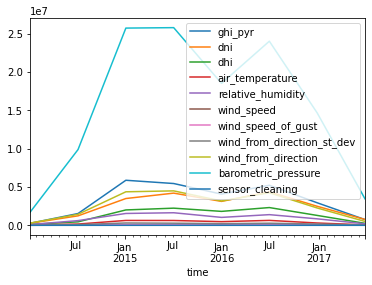

In [31]:
# line plot of all variables
sum_solar.plot()

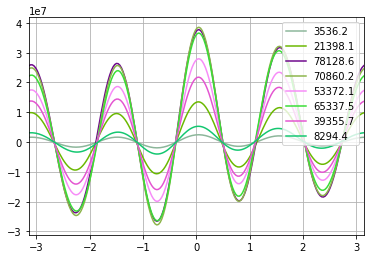

In [32]:
from pandas.plotting import andrews_curves

plt.figure();

andrews_curves(sum_solar, 'wind_speed');

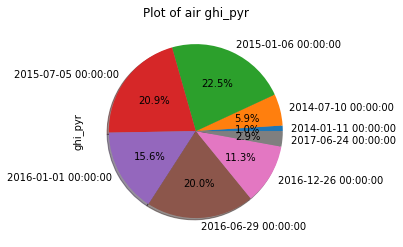

In [33]:
sum_solar.plot.pie(y = 'ghi_pyr', title='Plot of air ghi_pyr', legend=False, autopct = '%1.1f%%', shadow=True);

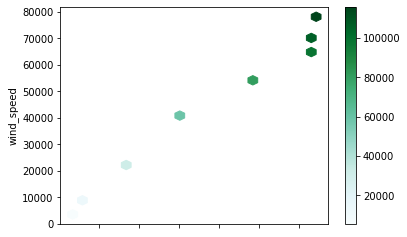

In [34]:
sum_solar.plot.hexbin(x = 'air_temperature', y = 'wind_speed', C = 'wind_speed_of_gust', reduce_C_function=np.max, gridsize=25);

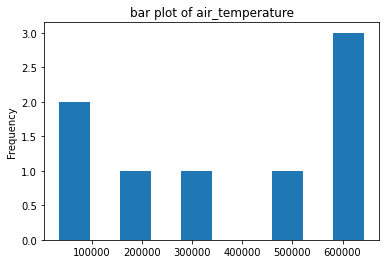

In [35]:
# histogram

sum_solar['air_temperature'].plot(kind = 'hist',  title='bar plot of air_temperature');
plt.show()

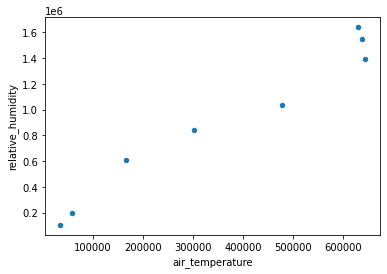

In [36]:
sum_solar.plot(kind = 'scatter', x = 'air_temperature', y = 'relative_humidity')

plt.show()

## **Joining Dataset**

In [37]:
census = pd.read_csv('/content/PEP_2016_PEPANNRES.csv' )
census.head()

,GEO.id,GEO.id2,GEO.display-label,rescen42010,resbase42010,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,respop72016
0,Id,Id2,Geography,"April 1, 2010 - Census","April 1, 2010 - Estimates Base",Population Estimate (as of July 1) - 2010,Population Estimate (as of July 1) - 2011,Population Estimate (as of July 1) - 2012,Population Estimate (as of July 1) - 2013,Population Estimate (as of July 1) - 2014,Population Estimate (as of July 1) - 2015,Population Estimate (as of July 1) - 2016
1,0610000US0900104720,0900104720,"Bethel town, Fairfield County, Connecticut",18584,18584,18642,18942,19150,19267,19316,19463,19627
2,0610000US0900108070,0900108070,"Bridgeport town, Fairfield County, Connecticut",144229,144236,144912,146226,146962,147666,147560,147090,145936
3,0610000US0900108980,0900108980,"Brookfield town, Fairfield County, Connecticut",16452,16452,16483,16635,16785,16859,17016,17087,17098
4,0610000US0900118500,0900118500,"Danbury town, Fairfield County, Connecticut",80893,80903,81356,82182,82788,83678,83687,84236,84992


In [38]:
census = pd.read_csv('/content/PEP_2016_PEPANNRES.csv', skiprows=[1])
census.head()

,GEO.id,GEO.id2,GEO.display-label,rescen42010,resbase42010,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,respop72016
0,0610000US0900104720,900104720,"Bethel town, Fairfield County, Connecticut",18584.0,18584,18642,18942,19150,19267,19316,19463,19627
1,0610000US0900108070,900108070,"Bridgeport town, Fairfield County, Connecticut",144229.0,144236,144912,146226,146962,147666,147560,147090,145936
2,0610000US0900108980,900108980,"Brookfield town, Fairfield County, Connecticut",16452.0,16452,16483,16635,16785,16859,17016,17087,17098
3,0610000US0900118500,900118500,"Danbury town, Fairfield County, Connecticut",80893.0,80903,81356,82182,82788,83678,83687,84236,84992
4,0610000US0900118850,900118850,"Darien town, Fairfield County, Connecticut",20732.0,20732,20777,20975,21127,21342,21641,21718,21744


In [39]:

#create city column, fill the city column with data from geo.display-label and seperate by comma
census['city'] = census['GEO.display-label'].apply(lambda x: x.split(',')[0])
census['state'] = census['GEO.display-label'].apply(lambda x: x.split(', ')[2])
census.head()

,GEO.id,GEO.id2,GEO.display-label,rescen42010,resbase42010,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,respop72016,city,state
0,0610000US0900104720,900104720,"Bethel town, Fairfield County, Connecticut",18584.0,18584,18642,18942,19150,19267,19316,19463,19627,Bethel town,Connecticut
1,0610000US0900108070,900108070,"Bridgeport town, Fairfield County, Connecticut",144229.0,144236,144912,146226,146962,147666,147560,147090,145936,Bridgeport town,Connecticut
2,0610000US0900108980,900108980,"Brookfield town, Fairfield County, Connecticut",16452.0,16452,16483,16635,16785,16859,17016,17087,17098,Brookfield town,Connecticut
3,0610000US0900118500,900118500,"Danbury town, Fairfield County, Connecticut",80893.0,80903,81356,82182,82788,83678,83687,84236,84992,Danbury town,Connecticut
4,0610000US0900118850,900118850,"Darien town, Fairfield County, Connecticut",20732.0,20732,20777,20975,21127,21342,21641,21718,21744,Darien town,Connecticut


In [40]:
#convert state name to abbreviation
print(census['state'].unique())

['Connecticut' 'Illinois' 'Indiana' 'Kansas' 'Maine' 'Massachusetts'
 'Michigan' 'Minnesota' 'Missouri' 'Nebraska' 'New Hampshire' 'New Jersey'
 'New York' 'North Dakota' 'Ohio' 'Pennsylvania' 'Rhode Island'
 'South Dakota' 'Vermont' 'Wisconsin']


In [41]:
state_abbr = dict(zip(census['state'].unique(),['CT', 'IL', 'IN', 'KS', 'MN', 'MS', 'MI', 'MA', 'MI', 'NB', 'NH', 'NJ', 'NY', 'ND', 'OH', 'PA', 'RI', 'SD', 'VM', 'WC']))
state_abbr

{'Connecticut': 'CT',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Kansas': 'KS',
 'Maine': 'MN',
 'Massachusetts': 'MS',
 'Michigan': 'MI',
 'Minnesota': 'MA',
 'Missouri': 'MI',
 'Nebraska': 'NB',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New York': 'NY',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Dakota': 'SD',
 'Vermont': 'VM',
 'Wisconsin': 'WC'}

In [42]:
# replacing the column state with the abbreviation
census['state'] = census['state'].replace(state_abbr)


In [43]:
census.head()

,GEO.id,GEO.id2,GEO.display-label,rescen42010,resbase42010,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,respop72016,city,state
0,0610000US0900104720,900104720,"Bethel town, Fairfield County, Connecticut",18584.0,18584,18642,18942,19150,19267,19316,19463,19627,Bethel town,CT
1,0610000US0900108070,900108070,"Bridgeport town, Fairfield County, Connecticut",144229.0,144236,144912,146226,146962,147666,147560,147090,145936,Bridgeport town,CT
2,0610000US0900108980,900108980,"Brookfield town, Fairfield County, Connecticut",16452.0,16452,16483,16635,16785,16859,17016,17087,17098,Brookfield town,CT
3,0610000US0900118500,900118500,"Danbury town, Fairfield County, Connecticut",80893.0,80903,81356,82182,82788,83678,83687,84236,84992,Danbury town,CT
4,0610000US0900118850,900118850,"Darien town, Fairfield County, Connecticut",20732.0,20732,20777,20975,21127,21342,21641,21718,21744,Darien town,CT


In [44]:
# from city names column, remove suffix words like (city, town,township, borough, village) 
census['city']

0                  Bethel town
1              Bridgeport town
2              Brookfield town
3                 Danbury town
4                  Darien town
                 ...          
21138              Sherry town
21139               Sigel town
21140           Vesper village
21141    Wisconsin Rapids city
21142                Wood town
Name: city, Length: 21143, dtype: object

In [45]:
census['city'][0].split()

['Bethel', 'town']

In [46]:
census['city'].apply(lambda x: ' '.join(x.split()[:-1]))

0                  Bethel
1              Bridgeport
2              Brookfield
3                 Danbury
4                  Darien
               ...       
21138              Sherry
21139               Sigel
21140              Vesper
21141    Wisconsin Rapids
21142                Wood
Name: city, Length: 21143, dtype: object

In [57]:

# this code will help select the first part of the city name 
census['city'] = census['city'].apply(lambda x: ' '.join(x.split()[:-1]))
census.head()

,GEO.id,GEO.id2,GEO.display-label,rescen42010,resbase42010,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,respop72016,city,state
0,0610000US0900104720,900104720,"Bethel town, Fairfield County, Connecticut",18584.0,18584,18642,18942,19150,19267,19316,19463,19627,,CT
1,0610000US0900108070,900108070,"Bridgeport town, Fairfield County, Connecticut",144229.0,144236,144912,146226,146962,147666,147560,147090,145936,,CT
2,0610000US0900108980,900108980,"Brookfield town, Fairfield County, Connecticut",16452.0,16452,16483,16635,16785,16859,17016,17087,17098,,CT
3,0610000US0900118500,900118500,"Danbury town, Fairfield County, Connecticut",80893.0,80903,81356,82182,82788,83678,83687,84236,84992,,CT
4,0610000US0900118850,900118850,"Darien town, Fairfield County, Connecticut",20732.0,20732,20777,20975,21127,21342,21641,21718,21744,,CT


## BRING IN A ZIP DATASET

In [48]:
import gzip

try:
    import simplejson as json
except ModuleNotFoundError:
    print('Module Installing...')
    !pip install simplejson 

In [54]:
data=pd.read_json('/content/yelp.json', lines=True)
data.head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
0,vcNAWiLM4dR7D2nwwJ7nCA,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{'Tuesday': {'close': '17:00', 'open': '08:00'...",True,"[Doctors, Health & Medical]",Phoenix,7,"Eric Goldberg, MD",[],-111.983758,AZ,3.5,33.499313,{'By Appointment Only': True},business
1,JwUE5GmEO-sH1FuwJgKBlQ,"6162 US Highway 51\nDe Forest, WI 53532",{},True,[Restaurants],De Forest,26,Pine Cone Restaurant,[],-89.335844,WI,4.0,43.238893,"{'Take-out': True, 'Good For': {'dessert': Fal...",business
2,uGykseHzyS5xAMWoN6YUqA,"505 W North St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '06:00'}...",True,"[American (Traditional), Restaurants]",De Forest,16,Deforest Family Restaurant,[],-89.353437,WI,4.0,43.252267,"{'Take-out': True, 'Good For': {'dessert': Fal...",business
3,LRKJF43s9-3jG9Lgx4zODg,"4910 County Rd V\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '10:30'}...",True,"[Food, Ice Cream & Frozen Yogurt, Fast Food, R...",De Forest,7,Culver's,[],-89.374983,WI,4.5,43.251045,"{'Take-out': True, 'Wi-Fi': 'free', 'Takes Res...",business
4,RgDg-k9S5YD_BaxMckifkg,"631 S Main St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '11:00'}...",True,"[Chinese, Restaurants]",De Forest,3,Chang Jiang Chinese Kitchen,[],-89.343722,WI,4.0,43.240875,"{'Take-out': True, 'Has TV': False, 'Outdoor S...",business


## **The 2 data are ready to be merged/joined now **

In [52]:
merged_df = data.merge(census, on = ['city', 'state'])
merged_df.head(5)

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,...,GEO.display-label,rescen42010,resbase42010,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,respop72016
0,ryyUldbIXZBRk72EFt9cWg,"The Lakes\nRochester, NY 89113","{'Monday': {'close': '21:00', 'open': '09:00'}...",True,"[Photographers, Event Planning & Services]",Rochester,10,Emily Ku Photography,[The Lakes],-115.285034,...,"Rochester city, Monroe County, New York",210565.0,210756,210624,211133,211182,211134,210521,209734,208880
1,ryyUldbIXZBRk72EFt9cWg,"The Lakes\nRochester, NY 89113","{'Monday': {'close': '21:00', 'open': '09:00'}...",True,"[Photographers, Event Planning & Services]",Rochester,10,Emily Ku Photography,[The Lakes],-115.285034,...,"Rochester town, Ulster County, New York",7313.0,7312,7307,7310,7270,7244,7245,7243,7230


In [58]:
merged_df[(merged_df.city == 'Rochester') & (merged_df.state == 'WI')]

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,...,GEO.display-label,rescen42010,resbase42010,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,respop72016


#Inner join is when you keep the rows from different data sets that matches this is often a default behaviour of python, rows from data that has no match are discarded

what happens if we find no matchin rows in a data set, There are 4 possible options;

1. we only keep rows from both datasets if they match, if no match is found on eith tables, we discard the row completely 'inner join'

2. we can keep all rows from both datasets 'data' and 'census' even if they dont have a matching rows i.e if a row in 'data' has no match in 'census' are merged with null values and vice-versa. this is called Outer Join

3. Left Join.  priviledge is given to the first dataset i.e if a row in 'data' has not match with census, we fill it with NA but the reverse is not true.
we could give a priviliege to the yelp data, when a row has no match in census, will fill the missing census column with NA, however on the reverse case we discard

4. We can give the priviledge to the dependent data i.e 'census' as this is called 'Right join'

In [65]:
#OUTER MATCH

merged_df_outer = data.merge(census, on = ['city', 'state'], how= 'outer')
merged_df_outer.head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,...,GEO.display-label,rescen42010,resbase42010,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,respop72016
0,vcNAWiLM4dR7D2nwwJ7nCA,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{'Tuesday': {'close': '17:00', 'open': '08:00'...",True,"[Doctors, Health & Medical]",Phoenix,7.0,"Eric Goldberg, MD",[],-111.983758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,x5Mv61CnZLohZWxfCVCPTQ,"2819 N Central Ave\nPhoenix, AZ 85004",{},True,"[Sandwiches, Pizza, Chicken Wings, Restaurants]",Phoenix,12.0,Domino's Pizza,[],-112.073418,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2ZnCITVa0abGce4gZ6RhIw,"1850 N Central Ave\nPhoenix, AZ 85004",{},True,"[American (New), Sandwiches, Restaurants]",Phoenix,5.0,Viad Tower Restaurants,[],-112.074315,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EmzaQR5hQlF0WIl24NxAZA,"132 E Washington St\nPhoenix, AZ 85004","{'Sunday': {'close': '02:00', 'open': '21:00'}...",True,"[American (New), Nightlife, Dance Clubs, Resta...",Phoenix,20.0,Sky Lounge,[],-112.071702,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SiwN7f0N4bs4ZtPc4yPgiA,"710 N Central Ave\nPhoenix, AZ 85004",{},True,"[Nightlife, Dance Clubs]",Phoenix,15.0,Palazzo,[],-112.074225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
#Left Join
merged_df_left = data.merge(census, on = ['city', 'state'], how= 'left')
merged_df_left.head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,...,GEO.display-label,rescen42010,resbase42010,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,respop72016
0,vcNAWiLM4dR7D2nwwJ7nCA,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{'Tuesday': {'close': '17:00', 'open': '08:00'...",True,"[Doctors, Health & Medical]",Phoenix,7,"Eric Goldberg, MD",[],-111.983758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JwUE5GmEO-sH1FuwJgKBlQ,"6162 US Highway 51\nDe Forest, WI 53532",{},True,[Restaurants],De Forest,26,Pine Cone Restaurant,[],-89.335844,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,uGykseHzyS5xAMWoN6YUqA,"505 W North St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '06:00'}...",True,"[American (Traditional), Restaurants]",De Forest,16,Deforest Family Restaurant,[],-89.353437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LRKJF43s9-3jG9Lgx4zODg,"4910 County Rd V\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '10:30'}...",True,"[Food, Ice Cream & Frozen Yogurt, Fast Food, R...",De Forest,7,Culver's,[],-89.374983,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RgDg-k9S5YD_BaxMckifkg,"631 S Main St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '11:00'}...",True,"[Chinese, Restaurants]",De Forest,3,Chang Jiang Chinese Kitchen,[],-89.343722,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
merged_df_right = data.merge(census, on = ['city', 'state'], how= 'right')
merged_df_right.head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,...,GEO.display-label,rescen42010,resbase42010,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,respop72016
0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,...,"Bethel town, Fairfield County, Connecticut",18584.0,18584,18642,18942,19150,19267,19316,19463,19627
1,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,...,"Bridgeport town, Fairfield County, Connecticut",144229.0,144236,144912,146226,146962,147666,147560,147090,145936
2,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,...,"Brookfield town, Fairfield County, Connecticut",16452.0,16452,16483,16635,16785,16859,17016,17087,17098
3,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,...,"Danbury town, Fairfield County, Connecticut",80893.0,80903,81356,82182,82788,83678,83687,84236,84992
4,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,...,"Darien town, Fairfield County, Connecticut",20732.0,20732,20777,20975,21127,21342,21641,21718,21744


In [71]:
#merged_df_cross = data.merge(census, on = ['city', 'state'], how= 'cross')
#merged_df_cross.head()

In [72]:
print(merged_df.shape)
print(merged_df_outer.shape)
print(merged_df_left.shape) 
print(merged_df_right.shape)

(2, 27)
(59081, 27)
(37938, 27)
(21143, 27)


In [100]:
# because we have 2 common columns, the 2 columns will be removed from the total number of coloumns hence we have 27 total columns

print (f'sample sizes of the different joins:\
\n==================================\
\nYelp Data: {data.shape[0]} rows, {data.shape[1]} column\
\nCensus Data: {census.shape[0]} rows, {census.shape[1]} column\
\nInner join: {merged_df.shape[0]} rows, {merged_df.shape[1]} column\
\nOuter join: {merged_df_outer.shape[0]} rows, {merged_df_outer.shape[1]} column\
\nLeft join: {merged_df_left.shape[0]} rows, {merged_df_left.shape[1]} column\
\nRight join: {merged_df_right.shape[0]} rows, {merged_df_right.shape[1]} column')

sample sizes of the different joins:
Yelp Data: 37938 rows, 15 column
Census Data: 21143 rows, 14 column
Inner join: 2 rows, 27 column
Outer join: 59081 rows, 27 column
Left join: 37938 rows, 27 column
Right join: 21143 rows, 27 column


In [103]:
'''
my name is jide kuti

'''


10+20

30

sometime, we may need not to merge, all we need to do is to add column rows to the data set, this can be dont by concatenation 'concat'. concat can be used  top perform inner and out join based on index. 